## Choosing the right estimator/algorithm for your problem

Some things to note: 
* Sklearn refers to machine learning models, algorithm as estimators
* Classification problem - predicting a category (heart disease or not)
  * Sometimes you will see 'clf' (short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)



In [ ]:
# standard imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



### 2.1 Picking a machine learning model for a regression problem

Let's use the California Housing dataset

In [ ]:
# get california housing dataset
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# import algorithm 
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# setup random seed 
np.random.seed(42)

# create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price is USD 100,000

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate and fir the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# check the score of the model (on the test set)
model.score(X_test, y_test)


0.5758549611440126

In [ ]:
# import algorithm 
from sklearn.linear_model import LassoLars
from sklearn.model_selection import train_test_split

# setup random seed 
np.random.seed(42)

# create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price is USD 100,000

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate and fir the model (on the training set)
model = LassoLars(alpha=0.1, normalize=False)
model.fit(X_train, y_train)

# check the score of the model (on the test set)
model.score(X_test, y_test)

0.5318931831658317

In [ ]:
# import algorithm 
from sklearn import svm
from sklearn.model_selection import train_test_split

# setup random seed 
np.random.seed(42)

# create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price is USD 100,000

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# instantiate and fir the model (on the training set)
model = svm.SVR()
model.fit(X_train, y_train)

# check the score of the model (on the test set)
model.score(X_test, y_test)

-0.016485360107173275

What if `Ridge` did not work or the score did not fit our needs? 

Well, we could always try a different model.. 

How about we try an ensemble modek (an ensemble is combination of smaller models to try and make better predictions than just a single model)


In [ ]:
# import algorithm 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# setup random seed 
np.random.seed(42)

# create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price is USD 100,000

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate and fir the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# check the score of the model (on the test set)
model.score(X_test, y_test)

0.8066196804802649

## 2.2 Picking a machine learning model for a classification problem

In [ ]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
len(heart_disease)

303

Consulting the map and it says to try LinearSVC

In [ ]:
# import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# setup random seed
np.random.seed(42)

# make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate LinearSVC
clf = LinearSVC(max_iter=100000)
clf.fit(X_train, y_train)

# evaluate the LinearSVC
clf.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.8852459016393442

In [ ]:
# import the random forest estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate LinearSVC
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# evaluate the LinearSVC
clf.score(X_test, y_test)

0.8524590163934426

Titbit: 

1. If you have structured data, use ensemble methods
2. If you have unstructred data, use deep learning or transfer learning

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

In [ ]:
# import the random forest classifier
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate LinearSVC
clf = RandomForestClassifier()

# training the machine learning model
clf.fit(X_train, y_train)

# evaluate the LinearSVC
clf.score(X_test, y_test)

0.8524590163934426

### 3.2 Make predictions using a machine learning model

2 ways to make predictions: 
1. `predict()`
2. `predict_proba()`

In [ ]:
# Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
# compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

### Make predictions with predict_proba()


In [ ]:
# predict_proba  returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [ ]:
# predicting from regression problem
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create model instance
model = RandomForestRegressor()

# fir the model
model.fit(X_train, y_train)

# make predictions
y_preds  = model.predict(X_test)

In [ ]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [ ]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3265721842781009

## 4. Evaluating a machine learning model

Three ways to evaluate Sklearn models/estimators: 
1. Estimator's built-in `score` method
2. The `scoring` parameter
3. Problem-specific metric functions

### 4.1 Evaluating a model with `score` method


In [ ]:
# import the random forest estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate LinearSVC
clf = RandomForestClassifier()
clf.fit(X_train, y_train)



RandomForestClassifier()

In [ ]:
# the highest score value for the .score() method is 1.0 and the lowest is 0.0

clf.score(X_train, y_train)

1.0

In [ ]:
# evaluate the classifier
clf.score(X_test, y_test)

0.8524590163934426

Let's use the `score` on our regression problem

In [ ]:
# import algorithm 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# setup random seed 
np.random.seed(42)

# create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price is USD 100,000

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate and fir the model (on the training set)
model = RandomForestRegressor(n_estimators=500)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=500)

In [ ]:
# The default score() evaluation metric is r_squared for regression algorithms
# check the score of the model (on the test set)
model.score(X_test, y_test)

0.8082214606280393

### 4.2 Evaluating a model with `scoring` parameter

In [ ]:
from sklearn.model_selection import cross_val_score

# import the random forest estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)



RandomForestClassifier()

In [ ]:
clf.score(X_test, y_test)

0.8524590163934426

In [ ]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [ ]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [ ]:
np.random.seed(42)

# single training and test split score
clf_single_score = clf.score(X_test, y_test)

# take the mean of 5-fold-cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [ ]:
# scoring parameter set to none by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf=RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)


In [ ]:
np.mean(cross_val_score)

0.8248087431693989

In [ ]:
print(f'Heart disease classifier, Cross-Validated accuracy: {np.mean(cross_val_score)*100: .2f}%' )

Heart disease classifier, Cross-Validated accuracy:  82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr). 

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1


In [ ]:
# create x_test..
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.metrics import roc_curve

# fit the classifier
clf.fit(X_train, y_train)

# make predictions with probablitlies
y_probs = clf.predict_proba(X_test)
y_probs[:10]

# keep 

array([[0.58, 0.42],
       [0.16, 0.84],
       [0.49, 0.51],
       [0.78, 0.22],
       [0.55, 0.45],
       [0.1 , 0.9 ],
       [0.29, 0.71],
       [0.98, 0.02],
       [0.1 , 0.9 ],
       [0.46, 0.54]])

In [ ]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.42, 0.84, 0.51, 0.22, 0.45, 0.9 , 0.71, 0.02, 0.9 , 0.54])

In [ ]:
# calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
       0.20689655, 0.24137931, 0.24137931, 0.27586207, 0.34482759,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.51724138,
       0.51724138, 0.55172414, 0.5862069 , 0.65517241, 0.72413793,
       0.79310345, 1.        ])

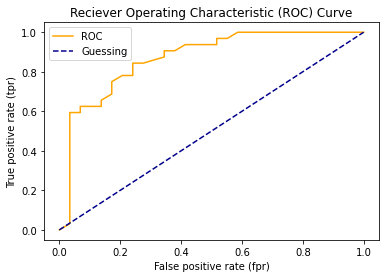

In [ ]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr): 
  """ 
  Plots a ROC curve given the false positive rate (fpr)
  and true positive rate (tpr) of a model
  """
  # plot the curve
  plt.plot(fpr, tpr, color="orange", label="ROC")

  # plot line with no predictive power (baseline)
  plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

  # customise the plot
  plt.xlabel("False positive rate (fpr)")
  plt.ylabel("True positive rate (tpr)")
  plt.title("Reciever Operating Characteristic (ROC) Curve")
  plt.legend()
  plt.show()

plot_roc_curve(fpr, tpr)




In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8701508620689655

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. 

In essence, giving you an idea of where the model is getting confused

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[22,  7],
       [ 5, 27]])

In [ ]:
# Visualize confusion matrix with pd.crosstab
pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,22,7
1,5,27


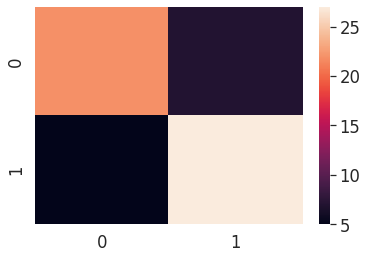

In [ ]:
# make our confusion matrix more visual with seaborn's heatmap()

import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# plot it using seaborn
sns.heatmap(conf_mat)

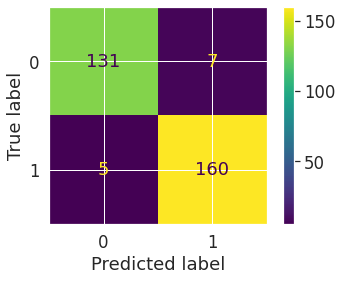

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)


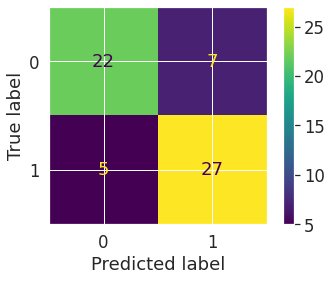

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        29
           1       0.79      0.84      0.82        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



### 4.2.2 Regression model evaluation metrics

1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)



0.8066196804802649

In [ ]:
from sklearn.metrics import r2_score

# fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())


In [ ]:
y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [ ]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

**Mean Absolute Error (MAE)**

MAE is the average of the absolute differences between predictions and actual validation
It gives you an idea of how wrong your models predictions are.

In [ ]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae


0.3265721842781009

**Mean Squared Error (MAE)**

MSE is the mean of the square of the errors between actual and predicted values.


It gives you an idea of how wrong your models predictions are.

In [ ]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse


0.2534073069137548

### 4.2.4 Finally using the `scoring` parameter

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()


In [ ]:
np.random.seed(42)

# cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) # if scoring=None, estimator's default scoring evualtion metric is used (accuracy for classification models)
cv_acc


array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [ ]:
# cross-validated accuracy
print(f'The corss-validated accuracy is: {np.mean(cv_acc)*100: .2f}%')

The corss-validated accuracy is:  82.48%


In [ ]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [ ]:
# cross-validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100: .2f}%')

The cross-validated accuracy is:  82.48%


In [ ]:
np.random.seed(42)

cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [ ]:
# cross-validated precision
print(f'The cross-validated precision is: {np.mean(cv_precision)}')

The cross-validated precision is: 0.8329547346025924


In [ ]:
np.random.seed(42)

cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [ ]:
# cross-validated recall
print(f'The cross-validated recall is: {np.mean(cv_recall)}')

The cross-validated recall is: 0.8545454545454545


Let's see the `scoring` parameter for regression model

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis =1)
y = housing_df["target"]

model = RandomForestRegressor()

In [ ]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3)

In [ ]:
np.mean(cv_r2)

0.6545756342466266

In [ ]:
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
cv_mae

array([-0.51752855, -0.4267802 , -0.50633939])

In [ ]:
np.mean(cv_mae)

-0.4835493810852714

In [ ]:
np.random.seed(42)
cv_mse = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error")
cv_mse

array([-0.51013593, -0.33368417, -0.54029594])

In [ ]:
np.mean(cv_mse)

-0.4613720134531419

## 4.3 Using Different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to `sklearn.metrics` module

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

# clf.score(X_test, y_test)

print("Classifier metrics on the test set")
print(f'Accuracy: {accuracy_score(y_test, y_preds)*100: .2f}%')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')

Classifier metrics on the test set
Accuracy:  85.25%
Precision: 0.8484848484848485
Recall: 0.875


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

y_preds = model.predict(X_test)
# model.score(X_test, y_test)
print("Regression metrics on the test set")
print(f'r2_score: {r2_score(y_test, y_preds)*100: .2f}%')
print(f'mean_absolute_error: {mean_absolute_error(y_test, y_preds)}')
print(f'mean_squared_error: {mean_squared_error(y_test, y_preds)}')

Regression metrics on the test set
r2_score:  80.66%
mean_absolute_error: 0.3265721842781009
mean_squared_error: 0.2534073069137548


## 5. Improving a model

First predictions = baseline predictions
First model = baseline model

From a data perspective: 
* Could we collect more data? (generally, the more data, the better) 
* Could we improve our data? 

From a model perspective: 
* Is there a better model we could use? 
* Could we improve the current model? 

Parameters = model find these patterns in data

Hyperparameters = Settings on a model you can adjust to potentially improve its ability to find patterns


Three ways to adjust hyperparameters: 
1. By Hand
2. Randomly with RandomSearchCV
3. Randomly with GridSearchCV



In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()



In [ ]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We are going to try and adjust

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [ ]:
def evaluate_preds(y_true, y_preds): 
  """
  Performs evaluation comparison on y_true labels vs y_pred labels
  """

  accuracy = accuracy_score(y_true, y_preds)
  precision = precision_score(y_true, y_preds)
  recall = recall_score(y_true, y_preds)
  f1 = f1_score(y_true, y_preds)

  metrics_dict = {"accuracy": round(accuracy, 2),
                  "precision": round(precision, 2), 
                  "recall": round(recall, 2), 
                  "f1": round(f1, 2)
                  }
  

  print(f'Accuracy: {accuracy * 100: .2f}%')
  print(f'Precision: {precision: .2f}')
  print(f'Recall: {recall: .2f}')
  print(f'f1 score: {f1: .2f}')


  return metrics_dict

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# split the data into train, validation and test sets
train_split = round(0.7* len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

# len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics 

Accuracy:  82.22%
Precision:  0.81
Recall:  0.88
f1 score:  0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [ ]:

clf2 = RandomForestClassifier(max_depth=100)
clf2.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf2.predict(X_valid)

# evaluate the classifier on validation set
clf_2_metrics = evaluate_preds(y_valid, y_preds)
clf_2_metrics 

Accuracy:  93.33%
Precision:  0.92
Recall:  0.96
f1 score:  0.94


{'accuracy': 0.93, 'precision': 0.92, 'recall': 0.96, 'f1': 0.94}

In [ ]:
### 5.2 Hyperparameter tuning with RandomizedSearchedCV

from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators" : [10, 100, 200, 500, 1000, 1200], 
        "max_depth": [None, 5, 10, 20, 30],
        "max_features" : ["auto", "sqrt"], 
        "min_samples_split" : [2, 4, 6], 
        "min_samples_leaf" : [1, 2, 4]}

np.random.seed(42)

# split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# split into train and tests sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instanstiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs = 1)

# setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=10 # number of models to try
                            , cv=5, verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [ ]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [ ]:
# make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy:  81.97%
Precision:  0.77
Recall:  0.86
f1 score:  0.81


In [ ]:
from sklearn.model_selection import GridSearchCV
grid_2 = {"n_estimators" : [100, 200, 500], 
        "max_depth": [None],
        "max_features" : ["auto", "sqrt"], 
        "min_samples_split" : [6], 
        "min_samples_leaf" : [1, 2]}



np.random.seed(42)

# split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# split into train and tests sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instanstiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs = 1)

# setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2, 
                            cv=5, verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [ ]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [ ]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)


Accuracy:  78.69%
Precision:  0.74
Recall:  0.82
f1 score:  0.78


Let's compare our different models metrics

In [ ]:
compare_metrics = pd.DataFrame({"baseline" : baseline_metrics, "clf_2" : clf_2_metrics, "random search" : rs_metrics, "Grid Search" : gs_metrics})

compare_metrics

,baseline,clf_2,random search,Grid Search
accuracy,0.80,0.93,0.82,0.79
precision,0.81,0.92,0.77,0.74
recall,0.84,0.96,0.86,0.82
f1,0.82,0.94,0.81,0.78


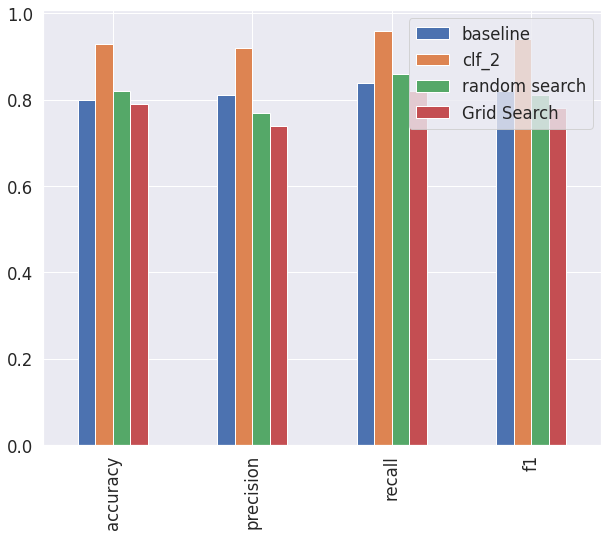

In [ ]:
compare_metrics.plot.bar(figsize=(10, 8))

In [ ]:
import pickle

# save an exisiting model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pk1", "wb"))

In [ ]:
# load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pk1", "rb"))


In [ ]:
# make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy:  78.69%
Precision:  0.74
Recall:  0.82
f1 score:  0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}